# 5.0 Data Visualizations

## 5.1 Plot Figure Pose

1. `plot_pose_figure()`:  This method plots a set of x-coordinates and y-coordinates from a dictionary at a specific index. It uses spline interpolation to create smooth trend lines to help user analyze the shape a pose creates
2. `plot_pose_contact_points()`:  This method plots a set of x-coordinates and y-coordinates from a dictionary at a specific index. It visualizes the landmarks that are connected based on a distance threshold.
3. `plot_pose_figure_angles()`: The method visualizes the pose angles and body part connections for a given pose. Arrows are plotted to represent the direction and magnitude of angles between joints, with arcs to visualize the angle span.

Applied Concepts:
1. Spline interpolation: https://en.wikipedia.org/wiki/Spline_interpolation
2. Euclidean vector: https://en.wikipedia.org/wiki/Euclidean_vector
3. Dot Product: https://en.wikipedia.org/wiki/Dot_product

## Set Up

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Pose Dictionaries
tricks = pd.read_csv('data/internal/tricks/pose_data.csv')
body = pd.read_csv('data/internal/positions/body/pose_data.csv')
legs = pd.read_csv('data/internal/positions/legs/pose_data.csv')
grip = pd.read_csv('data/internal/positions/grip/pose_data.csv')

# Ground Truth
upright = pd.read_csv('data/ground_truth/processed/upright/pose_data.csv')
combined = pd.read_csv('data/ground_truth/processed/combined/pose_data.csv')

cocoon_tricks = tricks[tricks['pose_name'].str.contains("cocoon", na=False)]
cocoon_tricks

,image_filename,pose_name,landmark_00_x,landmark_00_y,landmark_00_z,landmark_00_v,landmark_01_x,landmark_01_y,landmark_01_z,landmark_01_v,...,a_rgt_thumb_to_knuckles,a_rgt_shoulder_to_knee,a_rgt_hip_to_foot,a_rgt_foot_to_ankle,a_lft_shoulder_to_wrist,a_lft_elbow_to_knuckles,a_lft_thumb_to_knuckles,a_lft_shoulder_to_knee,a_lft_hip_to_foot,a_lft_foot_to_ankle
100,cocoon-lft.png,cocoon-lft,0.504197,0.692515,-0.490769,0.997975,0.485270,0.673390,-0.525867,0.998217,...,-44.1574,-227.3968,-204.9512,130.7333,211.9951,-157.3403,-83.4760,-258.4219,100.1494,189.8736
101,cocoon-rgt.png,cocoon-rgt,0.524098,0.693167,-0.400021,0.999902,0.534716,0.666492,-0.383344,0.999906,...,40.3750,-46.2850,202.7465,171.3455,146.3153,-203.1558,-128.2831,-137.7369,-106.9678,174.6490


### 5.1.1 Plot Pose Figure

In [7]:
import numpy as np
from matplotlib.patches import Circle, Polygon
import scipy.interpolate as interp

def smooth_line(x, y, s=0.5, k=3):
    if len(x) < 4:
        raise ValueError("At least four points are required to use spline interpolation.")
    tck, u = interp.splprep([x, y], s=s, k=k)
    unew = np.linspace(0, 1.00, 100)
    out = interp.splev(unew, tck)
    return out[0], out[1]
    
def plot_pose_figure(data, idx, spine=True, right_arm=False, left_arm=False,right_leg=False, left_leg=False, save_image=False):
    row = data.iloc[idx]
    fig, ax = plt.subplots(figsize=(5, 5))

    title = f"{row['pose_name']}" if 'pose_name' in row and pd.notna(row['pose_name']) else f"{row['image_filename'], row['pos_body']}"
    ax.set_title(title)

    default = 'silver'
    spine_color = 'black' if spine else 'silver'
    right_arm_color = 'magenta' if right_arm else 'silver'
    left_arm_color = 'lime' if left_arm else 'silver'
    right_leg_color = 'magenta' if right_leg else 'silver'
    left_leg_color = 'lime' if left_leg else 'silver'

    knees_x = (row['landmark_25_x'] + row['landmark_26_x'])/2
    knees_y = (row['landmark_25_y'] + row['landmark_26_y'])/2
    feet_x = (row['landmark_30_x'] + row['landmark_29_x'])/2
    feet_y = (row['landmark_30_y'] + row['landmark_29_y'])/2

    # Spine    
    Sx = [row['head_x'], row['chest_x'], row['stomach_x'], row['hip_x']]
    Sy = [row['head_y'], row['chest_y'], row['stomach_y'], row['hip_y']]
    ax.plot(Sx, Sy, color=mcolors.CSS4_COLORS[default], label="Spine", alpha=0.5, linewidth=2)
    head_circ = Circle((row['head_x'], row['head_y']), radius=0.02, color=mcolors.CSS4_COLORS[default], alpha=0.3,linewidth=2)
    ax.add_patch(head_circ)
    ax.scatter(row['head_x'], row['head_y'], color=mcolors.CSS4_COLORS[default], label="Head")
    ax.scatter(row['chest_x'], row['chest_y'], color=mcolors.CSS4_COLORS[default], label="Chest")
    ax.scatter(row['stomach_x'], row['stomach_y'], color=mcolors.CSS4_COLORS[default], label="Stomach")
    ax.scatter(row['hip_x'], row['hip_y'], color=mcolors.CSS4_COLORS[default], label="Mid Hip")
    
    # Torso
    Tx = [row['landmark_11_x'], row['landmark_12_x'], row['landmark_24_x'],row['landmark_23_x'],row['landmark_11_x']]
    Ty = [row['landmark_11_y'], row['landmark_12_y'], row['landmark_24_y'],row['landmark_23_y'],row['landmark_11_y']]    
    ax.plot(Tx, Ty, color=mcolors.CSS4_COLORS[default], label="Torso", alpha=0.5, linewidth=2)
    ax.scatter(row['landmark_11_x'], row['landmark_11_y'], color=mcolors.CSS4_COLORS[default], label="Torso")
    ax.scatter(row['landmark_12_x'], row['landmark_12_y'], color=mcolors.CSS4_COLORS[default], label="Torso")
    ax.scatter(row['landmark_23_x'], row['landmark_23_y'], color=mcolors.CSS4_COLORS[default], label="Torso")
    ax.scatter(row['landmark_24_x'], row['landmark_24_y'], color=mcolors.CSS4_COLORS[default], label="Torso")

    # Right Arm
    RAx = [row['landmark_12_x'], row['landmark_14_x'], row['landmark_16_x'], row['knuckles_right_x'], row['landmark_16_x']]
    RAy = [row['landmark_12_y'], row['landmark_14_y'], row['landmark_16_y'], row['knuckles_right_y'], row['landmark_16_y']]    
    ax.scatter(row['landmark_12_x'], row['landmark_12_y'], color=mcolors.CSS4_COLORS[right_arm_color], label="Right Shoulder")
    ax.scatter(row['landmark_14_x'], row['landmark_14_y'], color=mcolors.CSS4_COLORS[right_arm_color], label="Right Elbow")
    ax.scatter(row['landmark_16_x'], row['landmark_16_y'], color=mcolors.CSS4_COLORS[right_arm_color], label="Right Wrist")
    ax.scatter(row['knuckles_right_x'], row['knuckles_right_y'], color=mcolors.CSS4_COLORS[right_arm_color], label="Right Knuckles")
    ax.plot(RAx, RAy, color=mcolors.CSS4_COLORS[right_arm_color], label="Right Arm", alpha=0.5, linewidth=2)
    right_wrist = Circle((row['landmark_16_x'], row['landmark_16_y']), radius=0.01, color=mcolors.CSS4_COLORS[right_arm_color], alpha=0.5)
    ax.add_patch(right_wrist)
    

    # Left Arm
    LAx = [row['landmark_11_x'], row['landmark_13_x'], row['landmark_15_x'], row['knuckles_left_x'], row['landmark_15_x']]
    LAy = [row['landmark_11_y'], row['landmark_13_y'], row['landmark_15_y'], row['knuckles_left_y'], row['landmark_15_y']]        
    ax.plot(LAx, LAy, color=mcolors.CSS4_COLORS[left_arm_color], label="Left Arm", alpha=0.5, linewidth=2)    
    ax.scatter(row['landmark_11_x'], row['landmark_11_y'], color=mcolors.CSS4_COLORS[left_arm_color], label="Left Shoulder")
    ax.scatter(row['landmark_13_x'], row['landmark_13_y'], color=mcolors.CSS4_COLORS[left_arm_color], label="Left Elbow")
    ax.scatter(row['knuckles_left_x'], row['knuckles_left_y'], color=mcolors.CSS4_COLORS[left_arm_color], label="Left Knuckles")
    left_wrist = Circle((row['landmark_15_x'], row['landmark_15_y']), radius=0.01, color=mcolors.CSS4_COLORS[left_arm_color], alpha=0.5)
    ax.add_patch(left_wrist)

    # Right Leg
    RLx = [row['landmark_24_x'], row['landmark_26_x'], row['landmark_28_x'],row['landmark_32_x']]
    RLy = [row['landmark_24_y'], row['landmark_26_y'], row['landmark_28_y'],row['landmark_32_y']]
    ax.plot(RLx, RLy, color=mcolors.CSS4_COLORS[right_leg_color], label="Right Leg", alpha=0.5, linewidth=2)   
    right_ankle = Circle((row['landmark_28_x'], row['landmark_28_y']), radius=0.01, color=mcolors.CSS4_COLORS[right_leg_color], alpha=0.5)
    ax.add_patch(right_ankle)

    ax.scatter(row['landmark_24_x'], row['landmark_24_y'], color=mcolors.CSS4_COLORS[right_leg_color], label="Right Leg")
    ax.scatter(row['landmark_26_x'], row['landmark_26_y'], color=mcolors.CSS4_COLORS[right_leg_color], label="Right Leg")
    ax.scatter(row['landmark_32_x'], row['landmark_32_y'], color=mcolors.CSS4_COLORS[right_leg_color], label="Right Leg")

    # Left Leg
    LLx = [row['landmark_23_x'], row['landmark_25_x'], row['landmark_27_x'],row['landmark_31_x']]
    LLy = [row['landmark_23_y'], row['landmark_25_y'], row['landmark_27_y'],row['landmark_31_y']]
    ax.plot(LLx, LLy, color=mcolors.CSS4_COLORS[left_leg_color], label="Left Leg", alpha=0.5, linewidth=2)   
    left_ankle = Circle((row['landmark_27_x'], row['landmark_27_y']), radius=0.01, color=mcolors.CSS4_COLORS[left_leg_color], alpha=0.5)
    ax.add_patch(left_ankle)
    
    ax.scatter(row['landmark_23_x'], row['landmark_23_y'], color=mcolors.CSS4_COLORS[left_leg_color], label="Left Leg")
    ax.scatter(row['landmark_25_x'], row['landmark_25_y'], color=mcolors.CSS4_COLORS[left_leg_color], label="Left Leg")
    ax.scatter(row['landmark_31_x'], row['landmark_31_y'], color=mcolors.CSS4_COLORS[left_leg_color], label="Left Leg")    

    if spine:
        Sx_trend = [row['head_x'], row['chest_x'], row['stomach_x'], row['hip_x'], knees_x, feet_x]
        Sy_trend = [row['head_y'], row['chest_y'], row['stomach_y'], row['hip_y'], knees_y, feet_y]
        smooth_Sx, smooth_Sy = smooth_line(Sx_trend, Sy_trend) 
        ax.plot(smooth_Sx, smooth_Sy, color=mcolors.CSS4_COLORS['black'], label="Spine", alpha=0.7, linewidth=2)
        
    if right_arm:
        RAx_trend = [row['chest_x'],row['landmark_12_x'], row['landmark_14_x'], row['landmark_16_x'], row['knuckles_right_x']]
        RAy_trend = [row['chest_y'],row['landmark_12_y'], row['landmark_14_y'], row['landmark_16_y'], row['knuckles_right_y']]
        smooth_RAx, smooth_RAy = smooth_line(RAx_trend, RAy_trend) 
        ax.plot(smooth_RAx, smooth_RAy, color=mcolors.CSS4_COLORS['black'], label="Spine", alpha=0.7, linewidth=2)

    if left_arm:
        LAx_trend = [row['chest_x'],row['landmark_11_x'], row['landmark_13_x'], row['landmark_15_x'], row['knuckles_left_x']]
        LAy_trend = [row['chest_y'],row['landmark_11_y'], row['landmark_13_y'], row['landmark_15_y'], row['knuckles_left_y']]
        smooth_LAx, smooth_LAy = smooth_line(LAx_trend, LAy_trend) 
        ax.plot(smooth_LAx, smooth_LAy, color=mcolors.CSS4_COLORS['black'], label="Spine", alpha=0.7, linewidth=2)

    if right_leg:
        RLx_trend = [row['hip_x'], row['landmark_24_x'], row['landmark_26_x'], row['landmark_28_x'], row['landmark_30_x']]
        RLy_trend = [row['hip_y'], row['landmark_24_y'], row['landmark_26_y'], row['landmark_28_y'], row['landmark_30_y']]
        smooth_RLx, smooth_RLy = smooth_line(RLx_trend, RLy_trend) 
        ax.plot(smooth_RLx, smooth_RLy, color=mcolors.CSS4_COLORS['black'], label="Spine", alpha=0.7, linewidth=2)

    if left_leg:
        LLx_trend = [row['hip_x'],row['landmark_23_x'], row['landmark_25_x'], row['landmark_27_x'], row['landmark_29_x']]
        LLy_trend = [row['hip_y'],row['landmark_23_y'], row['landmark_25_y'], row['landmark_27_y'], row['landmark_29_y']]
        smooth_LLx, smooth_LLy = smooth_line(LLx_trend, LLy_trend) 
        ax.plot(smooth_LLx, smooth_LLy, color=mcolors.CSS4_COLORS['black'], label="Spine", alpha=0.7, linewidth=2)

    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.invert_yaxis()
    ax.set_xticks(np.arange(0, 1.05, 0.05))
    ax.set_yticks(np.arange(0, 1.05, 0.05))
    ax.set_xticklabels("")
    ax.set_yticklabels("")
    ax.grid(True)
    ax.grid(which='both', color='silver', linestyle='--', linewidth=0.5, alpha=0.2)

    if save_image:
        plt.savefig(f"drawing_{row['image_filename']}.png")
        plt.close()
    else:    
        plt.show()

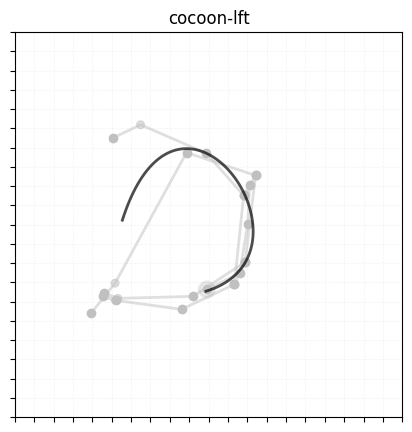

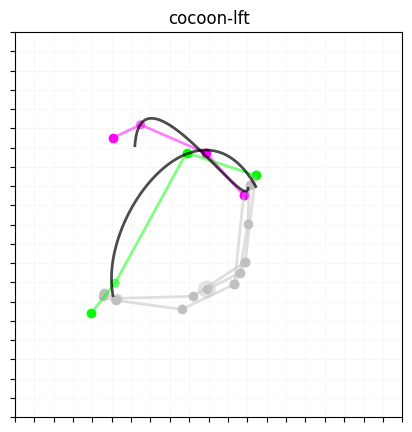

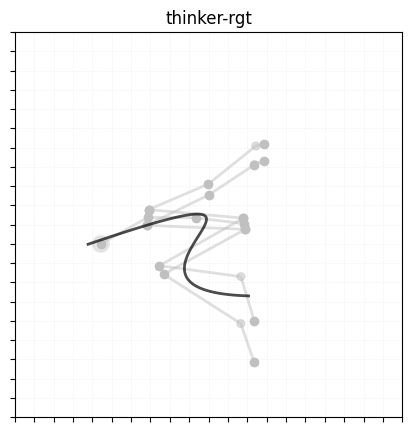

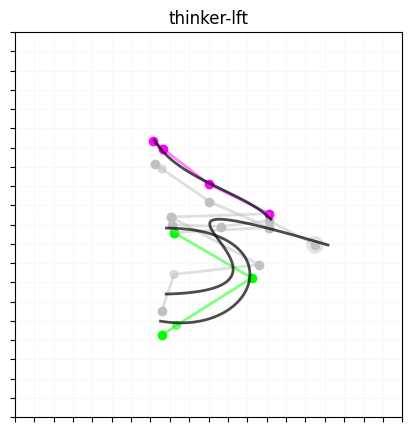

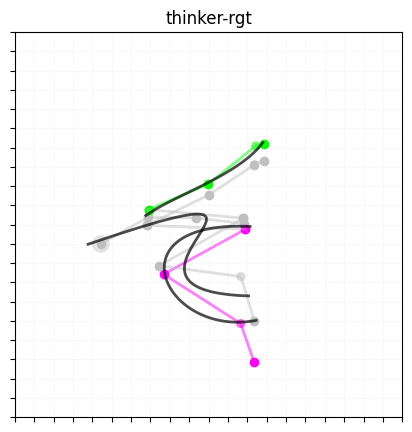

In [4]:
plot_pose_figure(data=tricks,idx=100)
plot_pose_figure(data=tricks,idx=100, spine=False, left_leg=True, right_leg=True)

plot_pose_figure(data=tricks,idx=515)
plot_pose_figure(data=tricks,idx=514, right_arm=True, left_leg=True)
plot_pose_figure(data=tricks,idx=515, left_arm=True, right_leg=True)

### Body Positions

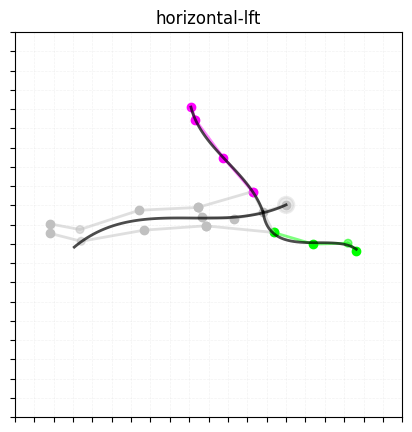

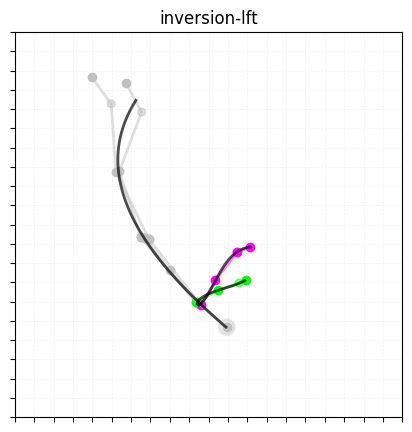

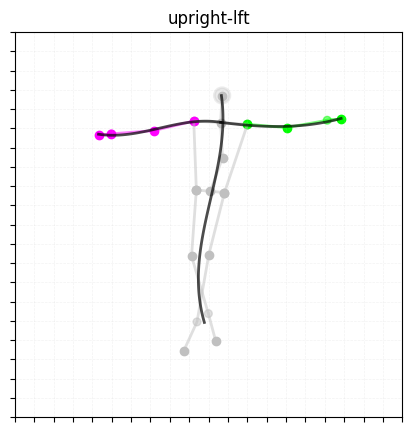

In [192]:
plot_pose_figure(data=body,idx=0, right_arm=True, left_arm=True)
plot_pose_figure(data=body,idx=2, right_arm=True, left_arm=True)
plot_pose_figure(data=body,idx=4, right_arm=True, left_arm=True)

### Leg Positions

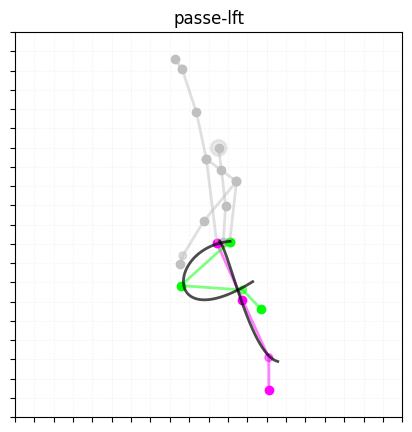

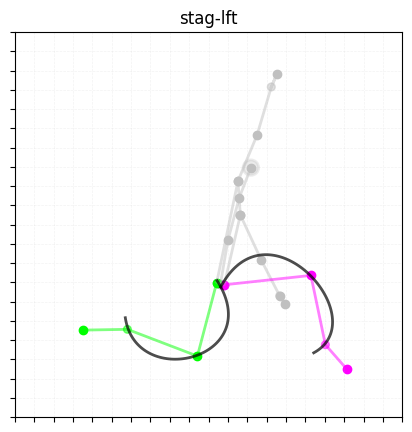

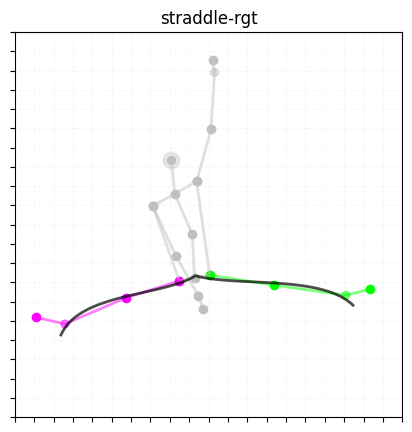

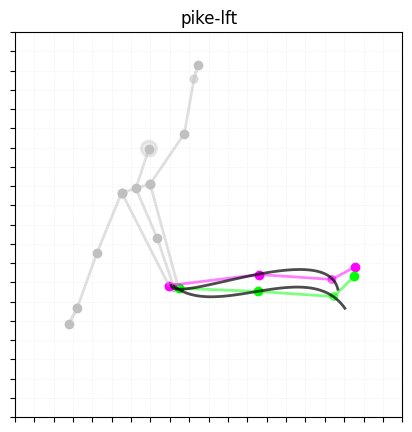

In [193]:
plot_pose_figure(data=legs,idx=17, spine=False, left_leg=True, right_leg=True)
plot_pose_figure(data=legs,idx=48, spine=False, left_leg=True, right_leg=True)
plot_pose_figure(data=legs,idx=56, spine=False, left_leg=True, right_leg=True)
plot_pose_figure(data=legs,idx=25, spine=False, left_leg=True, right_leg=True)

For plotting a video data.

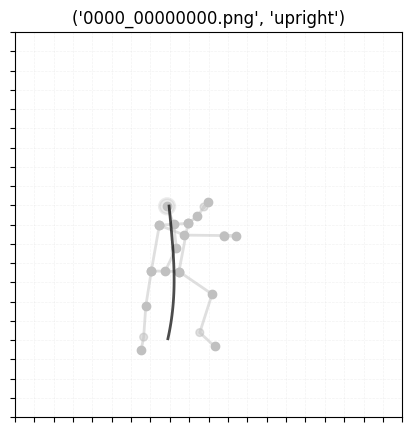

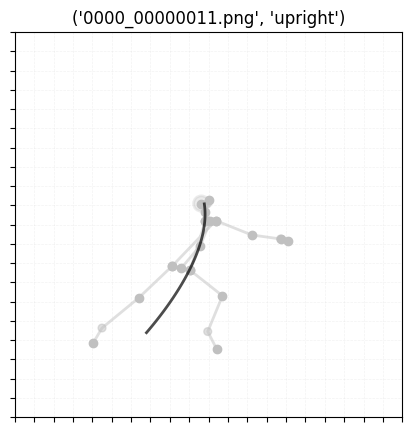

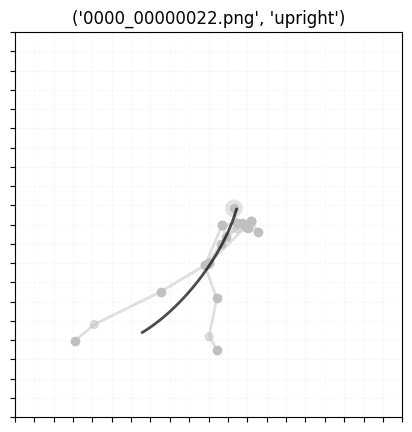

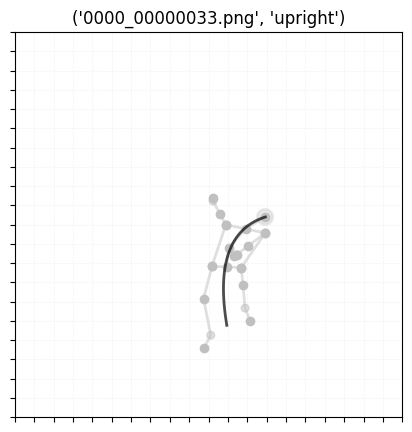

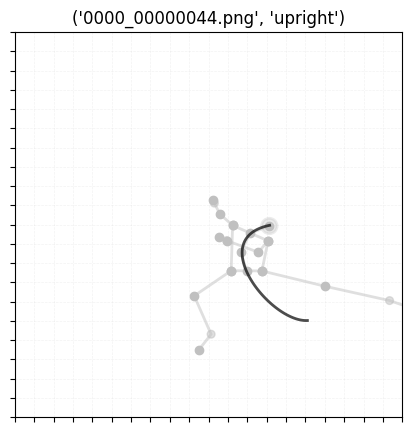

In [197]:
for i in range(0,5):
    plot_pose_figure(data=upright,idx=i)
    i+= 5

### 5.1.2 Plot Pose Figure Contact Points

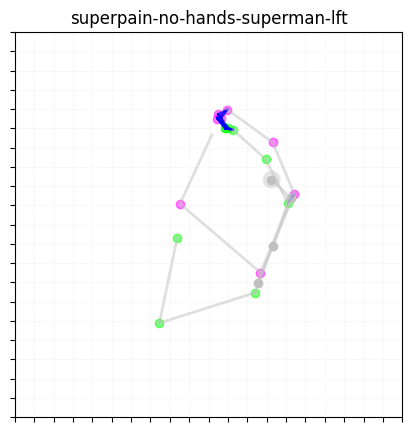

Connected pairs found: [(11, 12), (12, 12), (13, 13), (14, 14), (15, 15), (15, 17), (15, 19), (15, 21), (16, 16), (16, 18), (16, 20), (16, 22), (17, 15), (17, 17), (17, 19), (17, 20), (17, 21), (17, 22), (18, 16), (18, 18), (18, 20), (18, 22), (19, 15), (19, 17), (19, 19), (19, 20), (19, 21), (19, 22), (20, 16), (20, 17), (20, 18), (20, 19), (20, 20), (20, 21), (20, 22), (21, 15), (21, 17), (21, 19), (21, 20), (21, 21), (21, 22), (22, 16), (22, 17), (22, 18), (22, 19), (22, 20), (22, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27)]


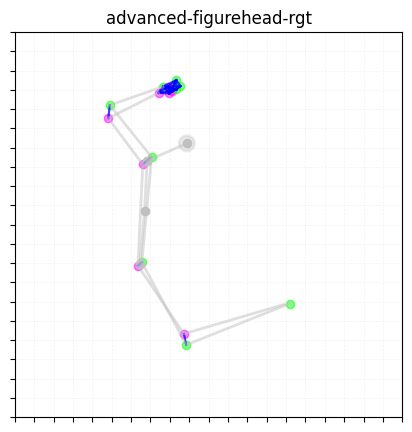

Connected pairs found: [(11, 12), (12, 12), (13, 13), (13, 14), (14, 13), (14, 14), (15, 15), (15, 16), (15, 17), (15, 18), (15, 20), (15, 21), (15, 22), (16, 15), (16, 16), (16, 18), (16, 20), (16, 22), (17, 15), (17, 17), (17, 18), (17, 19), (17, 20), (17, 21), (17, 22), (18, 15), (18, 16), (18, 17), (18, 18), (18, 19), (18, 20), (18, 21), (18, 22), (19, 17), (19, 18), (19, 19), (19, 20), (19, 21), (19, 22), (20, 15), (20, 16), (20, 17), (20, 18), (20, 19), (20, 20), (20, 21), (20, 22), (21, 15), (21, 17), (21, 18), (21, 19), (21, 20), (21, 21), (21, 22), (22, 15), (22, 16), (22, 17), (22, 18), (22, 19), (22, 20), (22, 21), (22, 22), (23, 23), (23, 24), (24, 23), (24, 24), (25, 25), (25, 26), (26, 25), (26, 26), (27, 27)]


In [8]:
from itertools import combinations

def plot_pose_contact_points(data, idx, spine=True, right_arm=False, left_arm=False,right_leg=False, left_leg=False, save_image=False):
    threshold=0.04
    row = data.iloc[idx]
    fig, ax = plt.subplots(figsize=(5, 5))

    title = f"{row['pose_name']}" if 'pose_name' in row and pd.notna(row['pose_name']) else f"{row['image_filename'], row['pos_body']}"
    ax.set_title(title)

    x_cols = sorted([col for col in data.columns if col.startswith('landmark_') and col.endswith('_x')])
    y_cols = sorted([col for col in data.columns if col.startswith('landmark_') and col.endswith('_y')])
    x = row[x_cols].values
    y = row[y_cols].values
    colors = ['magenta' if i % 2 == 0 else 'lime' for i in range(len(x))]

    for i in range(11, 28):
        color = 'magenta' if i % 2 == 0 else 'lime'
        ax.scatter(x[i], y[i], color=color, alpha=0.5)

    connected_pairs = []

    for i in range(11,28):
        for j in range(11+1,28):
            if np.hypot(x[i] - x[j], y[i] - y[j]) < threshold:
                ax.plot([x[i], x[j]], [y[i], y[j]], color='blue', alpha=0.5)
                connected_pairs.append((i, j))

    default = 'silver'
    spine_color = 'black' if spine else 'silver'
    right_arm_color = 'magenta' if right_arm else 'silver'
    left_arm_color = 'lime' if left_arm else 'silver'
    right_leg_color = 'magenta' if right_leg else 'silver'
    left_leg_color = 'lime' if left_leg else 'silver'

    # Spine    
    Sx = [row['head_x'], row['chest_x'], row['stomach_x'], row['hip_x']]
    Sy = [row['head_y'], row['chest_y'], row['stomach_y'], row['hip_y']]
    ax.plot(Sx, Sy, color=mcolors.CSS4_COLORS[default], label="Spine", alpha=0.5, linewidth=2)
    head_circ = Circle((row['head_x'], row['head_y']), radius=0.02, color=mcolors.CSS4_COLORS[default], alpha=0.3,linewidth=2)
    ax.add_patch(head_circ)
    ax.scatter(row['head_x'], row['head_y'], color=mcolors.CSS4_COLORS[default], label="Head")
    ax.scatter(row['chest_x'], row['chest_y'], color=mcolors.CSS4_COLORS[default], label="Chest")
    ax.scatter(row['stomach_x'], row['stomach_y'], color=mcolors.CSS4_COLORS[default], label="Stomach")
    ax.scatter(row['hip_x'], row['hip_y'], color=mcolors.CSS4_COLORS[default], label="Mid Hip")
   
    # Torso
    Tx = [row['landmark_11_x'], row['landmark_12_x'], row['landmark_24_x'],row['landmark_23_x'],row['landmark_11_x']]
    Ty = [row['landmark_11_y'], row['landmark_12_y'], row['landmark_24_y'],row['landmark_23_y'],row['landmark_11_y']]    
    ax.plot(Tx, Ty, color=mcolors.CSS4_COLORS[default], label="Torso", alpha=0.5, linewidth=2)
   
    # Right Arm
    RAx = [row['landmark_12_x'], row['landmark_14_x'], row['landmark_16_x']]
    RAy = [row['landmark_12_y'], row['landmark_14_y'], row['landmark_16_y']]    
    ax.plot(RAx, RAy, color=mcolors.CSS4_COLORS[right_arm_color], label="Right Arm", alpha=0.5, linewidth=2)
   

    # Left Arm
    LAx = [row['landmark_11_x'], row['landmark_13_x'], row['landmark_15_x']]
    LAy = [row['landmark_11_y'], row['landmark_13_y'], row['landmark_15_y']]        
    ax.plot(LAx, LAy, color=mcolors.CSS4_COLORS[left_arm_color], label="Left Arm", alpha=0.5, linewidth=2)    
    

    # Right Leg
    RLx = [row['landmark_24_x'], row['landmark_26_x'], row['landmark_28_x']]
    RLy = [row['landmark_24_y'], row['landmark_26_y'], row['landmark_28_y']]
    ax.plot(RLx, RLy, color=mcolors.CSS4_COLORS[right_leg_color], label="Left Leg", alpha=0.5, linewidth=2)
   
    LLx = [row['landmark_23_x'], row['landmark_25_x'], row['landmark_27_x']]
    LLy = [row['landmark_23_y'], row['landmark_25_y'], row['landmark_27_y']]
    ax.plot(LLx, LLy, color=mcolors.CSS4_COLORS[left_leg_color], label="Left Leg", alpha=0.5, linewidth=2)  
   
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.invert_yaxis()
    ax.set_xticks(np.arange(0, 1.05, 0.05))
    ax.set_yticks(np.arange(0, 1.05, 0.05))
    ax.set_xticklabels("")
    ax.set_yticklabels("")
    ax.grid(True)
    ax.grid(which='both', color='silver', linestyle='--', linewidth=0.5, alpha=0.2)

    if save_image:
        plt.savefig(f"drawing_{row['image_filename']}.png")
        plt.close()
    else:    
        plt.show()

    print("Connected pairs found:",connected_pairs)

plot_pose_contact_points(tricks, 498)
plot_pose_contact_points(tricks, 1)

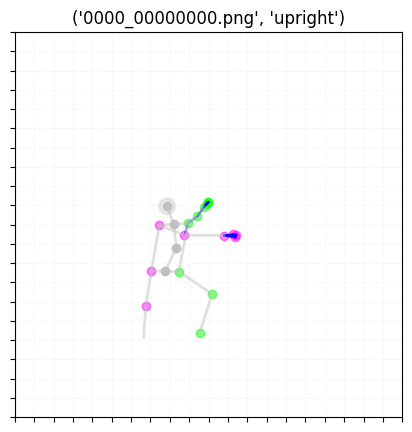

Connected pairs found: [(11, 13), (11, 14), (12, 12), (13, 13), (13, 15), (14, 14), (15, 13), (15, 15), (15, 17), (15, 19), (15, 21), (16, 16), (16, 18), (16, 20), (16, 22), (17, 15), (17, 17), (17, 19), (17, 21), (18, 16), (18, 18), (18, 20), (18, 22), (19, 15), (19, 17), (19, 19), (19, 21), (20, 16), (20, 18), (20, 20), (20, 22), (21, 15), (21, 17), (21, 19), (21, 21), (22, 16), (22, 18), (22, 20), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27)]


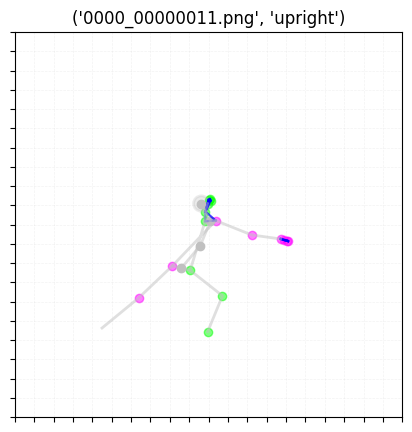

Connected pairs found: [(11, 12), (11, 13), (12, 12), (12, 13), (13, 12), (13, 13), (13, 15), (13, 17), (13, 19), (13, 21), (14, 14), (15, 13), (15, 15), (15, 17), (15, 19), (15, 21), (16, 16), (16, 18), (16, 20), (16, 22), (17, 13), (17, 15), (17, 17), (17, 19), (17, 21), (18, 16), (18, 18), (18, 20), (18, 22), (19, 13), (19, 15), (19, 17), (19, 19), (19, 21), (20, 16), (20, 18), (20, 20), (20, 22), (21, 13), (21, 15), (21, 17), (21, 19), (21, 21), (22, 16), (22, 18), (22, 20), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27)]


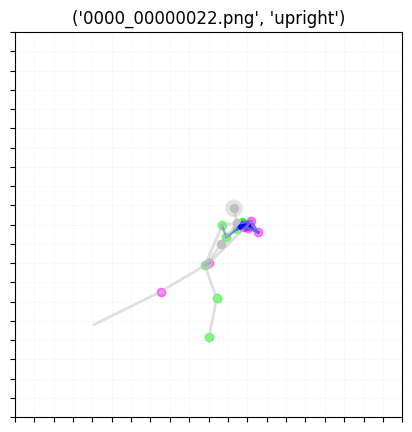

Connected pairs found: [(11, 13), (12, 12), (12, 14), (12, 16), (12, 17), (12, 18), (12, 19), (12, 20), (12, 21), (12, 22), (13, 13), (13, 15), (14, 12), (14, 14), (14, 16), (14, 18), (14, 22), (15, 13), (15, 15), (15, 16), (15, 17), (15, 18), (15, 19), (15, 20), (15, 21), (15, 22), (16, 12), (16, 14), (16, 15), (16, 16), (16, 17), (16, 18), (16, 19), (16, 20), (16, 21), (16, 22), (17, 12), (17, 15), (17, 16), (17, 17), (17, 18), (17, 19), (17, 20), (17, 21), (17, 22), (18, 12), (18, 14), (18, 15), (18, 16), (18, 17), (18, 18), (18, 19), (18, 20), (18, 21), (18, 22), (19, 12), (19, 15), (19, 16), (19, 17), (19, 18), (19, 19), (19, 20), (19, 21), (19, 22), (20, 12), (20, 15), (20, 16), (20, 17), (20, 18), (20, 19), (20, 20), (20, 21), (20, 22), (21, 12), (21, 15), (21, 16), (21, 17), (21, 18), (21, 19), (21, 20), (21, 21), (21, 22), (22, 12), (22, 14), (22, 15), (22, 16), (22, 17), (22, 18), (22, 19), (22, 20), (22, 21), (22, 22), (23, 23), (23, 24), (24, 23), (24, 24), (25, 25), (26, 2

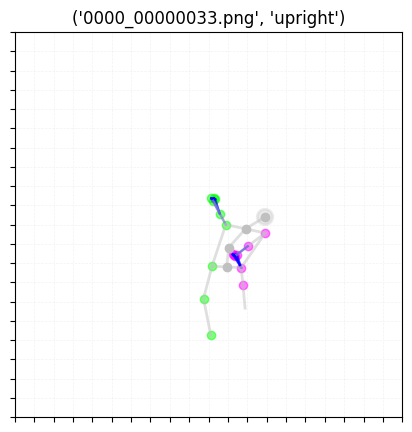

Connected pairs found: [(11, 13), (12, 12), (13, 13), (13, 15), (13, 21), (14, 14), (14, 16), (15, 13), (15, 15), (15, 17), (15, 19), (15, 21), (16, 14), (16, 16), (16, 18), (16, 20), (16, 22), (16, 24), (17, 15), (17, 17), (17, 19), (17, 21), (18, 16), (18, 18), (18, 20), (18, 22), (18, 24), (19, 15), (19, 17), (19, 19), (19, 21), (20, 16), (20, 18), (20, 20), (20, 22), (20, 24), (21, 13), (21, 15), (21, 17), (21, 19), (21, 21), (22, 16), (22, 18), (22, 20), (22, 22), (23, 23), (24, 16), (24, 18), (24, 20), (24, 24), (25, 25), (26, 26), (27, 27)]


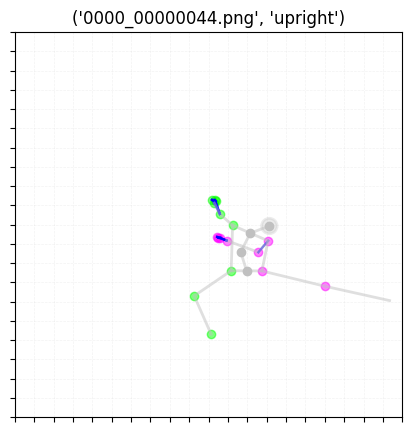

Connected pairs found: [(12, 12), (12, 14), (13, 13), (13, 15), (13, 19), (13, 21), (14, 12), (14, 14), (15, 13), (15, 15), (15, 17), (15, 19), (15, 21), (16, 16), (16, 18), (16, 20), (16, 22), (17, 15), (17, 17), (17, 19), (17, 21), (18, 16), (18, 18), (18, 20), (18, 22), (19, 13), (19, 15), (19, 17), (19, 19), (19, 21), (20, 16), (20, 18), (20, 20), (20, 22), (21, 13), (21, 15), (21, 17), (21, 19), (21, 21), (22, 16), (22, 18), (22, 20), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27)]


In [292]:
for i in range(0,5):
    plot_pose_contact_points(data=upright,idx=i)
    i+= 5

### 5.1.3 Plot Pose Figure Angles

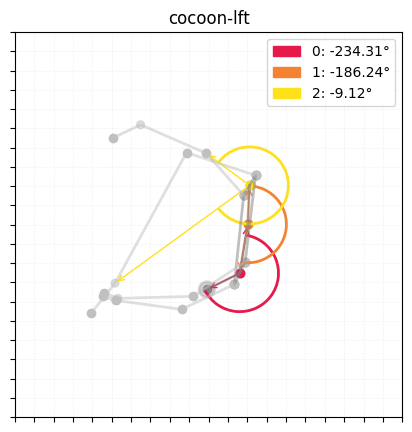

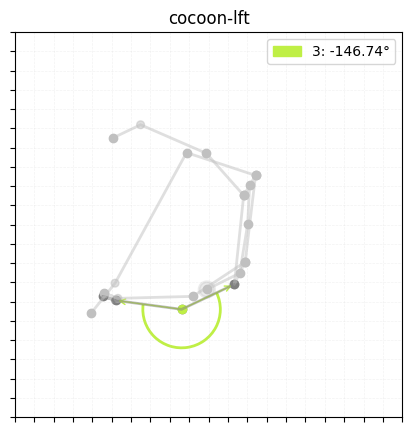

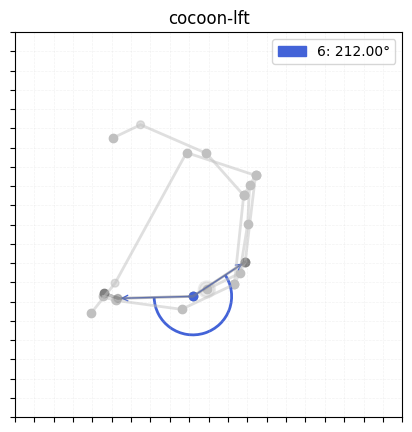

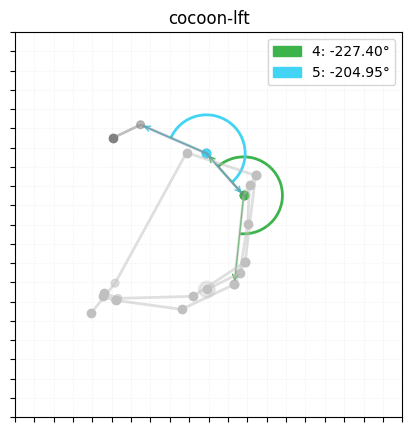

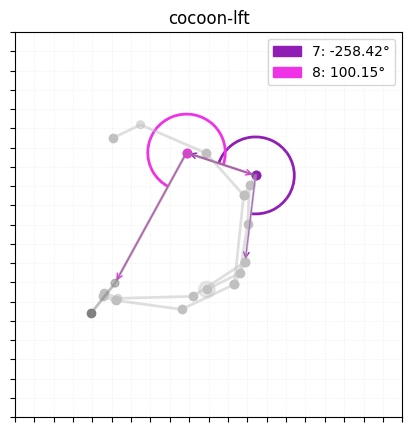

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import FancyArrowPatch, Arc
import matplotlib.patches as mpatches

def plot_pose_figure_angles(data, idx, spine=True, right_arm=False, left_arm=False,right_leg=False, left_leg=False):    
    row = data.iloc[idx]
    fig, ax = plt.subplots(figsize=(5, 5))

    title = f"{row['pose_name']}" if 'pose_name' in row and pd.notna(row['pose_name']) else f"{row['image_filename'], row['pos_body']}"
    ax.set_title(title)
    
    spine_color = 'gray' if spine else 'silver'
    right_arm_color = 'gray' if right_arm else 'silver'
    left_arm_color = 'gray' if left_arm else 'silver'
    right_leg_color = 'gray' if right_leg else 'silver'
    left_leg_color = 'gray' if left_leg else 'silver'

    # Spine    
    Sx = [row['head_x'], row['chest_x'], row['stomach_x'], row['hip_x']]
    Sy = [row['head_y'], row['chest_y'], row['stomach_y'], row['hip_y']]
    ax.plot(Sx, Sy, color=mcolors.CSS4_COLORS[spine_color], label="Spine", alpha=0.5, linewidth=2)
    head_circ = Circle((row['head_x'], row['head_y']), radius=0.02, color=mcolors.CSS4_COLORS[spine_color], alpha=0.3,linewidth=2)
    ax.add_patch(head_circ)
    ax.scatter(row['head_x'], row['head_y'], color=mcolors.CSS4_COLORS[spine_color], label="Head")
    ax.scatter(row['chest_x'], row['chest_y'], color=mcolors.CSS4_COLORS[spine_color], label="Chest")
    ax.scatter(row['stomach_x'], row['stomach_y'], color=mcolors.CSS4_COLORS[spine_color], label="Stomach")
    ax.scatter(row['hip_x'], row['hip_y'], color=mcolors.CSS4_COLORS[spine_color], label="Mid Hip")
    
    # Torso
    Tx = [row['landmark_11_x'], row['landmark_12_x'], row['landmark_24_x'],row['landmark_23_x'],row['landmark_11_x']]
    Ty = [row['landmark_11_y'], row['landmark_12_y'], row['landmark_24_y'],row['landmark_23_y'],row['landmark_11_y']]    
    ax.plot(Tx, Ty, color=mcolors.CSS4_COLORS[spine_color], label="Torso", alpha=0.5, linewidth=2)
    ax.scatter(row['landmark_11_x'], row['landmark_11_y'], color=mcolors.CSS4_COLORS[spine_color], label="Torso")
    ax.scatter(row['landmark_12_x'], row['landmark_12_y'], color=mcolors.CSS4_COLORS[spine_color], label="Torso")
    ax.scatter(row['landmark_23_x'], row['landmark_23_y'], color=mcolors.CSS4_COLORS[spine_color], label="Torso")
    ax.scatter(row['landmark_24_x'], row['landmark_24_y'], color=mcolors.CSS4_COLORS[spine_color], label="Torso")

    # Right Arm
    RAx = [row['landmark_12_x'], row['landmark_14_x'], row['landmark_16_x'], row['knuckles_right_x'], row['landmark_16_x']]
    RAy = [row['landmark_12_y'], row['landmark_14_y'], row['landmark_16_y'], row['knuckles_right_y'], row['landmark_16_y']]    
    ax.scatter(row['landmark_12_x'], row['landmark_12_y'], color=mcolors.CSS4_COLORS[right_arm_color], label="Right Shoulder")
    ax.scatter(row['landmark_14_x'], row['landmark_14_y'], color=mcolors.CSS4_COLORS[right_arm_color], label="Right Elbow")
    ax.scatter(row['landmark_16_x'], row['landmark_16_y'], color=mcolors.CSS4_COLORS[right_arm_color], label="Right Wrist")
    ax.scatter(row['knuckles_right_x'], row['knuckles_right_y'], color=mcolors.CSS4_COLORS[right_arm_color], label="Right Knuckles")
    ax.plot(RAx, RAy, color=mcolors.CSS4_COLORS[right_arm_color], label="Right Arm", alpha=0.5, linewidth=2)
    right_wrist = Circle((row['landmark_16_x'], row['landmark_16_y']), radius=0.01, color=mcolors.CSS4_COLORS[right_arm_color], alpha=0.5)
    ax.add_patch(right_wrist)
    

    # Left Arm
    LAx = [row['landmark_11_x'], row['landmark_13_x'], row['landmark_15_x'], row['knuckles_left_x'], row['landmark_15_x']]
    LAy = [row['landmark_11_y'], row['landmark_13_y'], row['landmark_15_y'], row['knuckles_left_y'], row['landmark_15_y']]        
    ax.plot(LAx, LAy, color=mcolors.CSS4_COLORS[left_arm_color], label="Left Arm", alpha=0.5, linewidth=2)    
    ax.scatter(row['landmark_11_x'], row['landmark_11_y'], color=mcolors.CSS4_COLORS[left_arm_color], label="Left Shoulder")
    ax.scatter(row['landmark_13_x'], row['landmark_13_y'], color=mcolors.CSS4_COLORS[left_arm_color], label="Left Elbow")
    ax.scatter(row['knuckles_left_x'], row['knuckles_left_y'], color=mcolors.CSS4_COLORS[left_arm_color], label="Left Knuckles")
    left_wrist = Circle((row['landmark_15_x'], row['landmark_15_y']), radius=0.01, color=mcolors.CSS4_COLORS[left_arm_color], alpha=0.5)
    ax.add_patch(left_wrist)

    # Right Leg
    RLx = [row['landmark_24_x'], row['landmark_26_x'], row['landmark_28_x'],row['landmark_32_x']]
    RLy = [row['landmark_24_y'], row['landmark_26_y'], row['landmark_28_y'],row['landmark_32_y']]
    ax.plot(RLx, RLy, color=mcolors.CSS4_COLORS[right_leg_color], label="Right Leg", alpha=0.5, linewidth=2)   
    right_ankle = Circle((row['landmark_28_x'], row['landmark_28_y']), radius=0.01, color=mcolors.CSS4_COLORS[right_leg_color], alpha=0.5)
    ax.add_patch(right_ankle)

    ax.scatter(row['landmark_24_x'], row['landmark_24_y'], color=mcolors.CSS4_COLORS[right_leg_color], label="Right Leg")
    ax.scatter(row['landmark_26_x'], row['landmark_26_y'], color=mcolors.CSS4_COLORS[right_leg_color], label="Right Leg")
    ax.scatter(row['landmark_32_x'], row['landmark_32_y'], color=mcolors.CSS4_COLORS[right_leg_color], label="Right Leg")

    # Left Leg
    LLx = [row['landmark_23_x'], row['landmark_25_x'], row['landmark_27_x'],row['landmark_31_x']]
    LLy = [row['landmark_23_y'], row['landmark_25_y'], row['landmark_27_y'],row['landmark_31_y']]
    ax.plot(LLx, LLy, color=mcolors.CSS4_COLORS[left_leg_color], label="Left Leg", alpha=0.5, linewidth=2)   
    left_ankle = Circle((row['landmark_27_x'], row['landmark_27_y']), radius=0.01, color=mcolors.CSS4_COLORS[left_leg_color], alpha=0.5)
    ax.add_patch(left_ankle)
    
    ax.scatter(row['landmark_23_x'], row['landmark_23_y'], color=mcolors.CSS4_COLORS[left_leg_color], label="Left Leg")
    ax.scatter(row['landmark_25_x'], row['landmark_25_y'], color=mcolors.CSS4_COLORS[left_leg_color], label="Left Leg")
    ax.scatter(row['landmark_31_x'], row['landmark_31_y'], color=mcolors.CSS4_COLORS[left_leg_color], label="Left Leg")

    colors = [
    '#e6194B',  # Red
    '#f58231',  # Orange
    '#ffe119',  # Yellow
    '#bfef45',  # Lime
    '#3cb44b',  # Green
    '#42d4f4',  # Cyan
    '#4363d8',  # Blue
    '#911eb4',  # Purple
    '#f032e6'   # Magenta
]
    legend_handles = []

    color_index = 0 
    

    angle_segments = {
        'spine': range(0, 3),
        'right_arm': range(3, 4),
        'right_leg': range(4, 6),
        'left_arm': range(6, 7),
        'left_leg': range(7, 9)
    }

    selected_angles = []
    if spine:
        selected_angles += angle_segments['spine']
    if right_arm:
        selected_angles += angle_segments['right_arm']
    if left_arm:
        selected_angles += angle_segments['left_arm']
    if right_leg:
        selected_angles += angle_segments['right_leg']
    if left_leg:
        selected_angles += angle_segments['left_leg']
        

    angles = {
        0: (row['a_head_to_stomach'], row['head_x'], row['head_y'],row['chest_x'], row['chest_y'], row['stomach_x'], row['stomach_y']),
        1: (row['a_chest_to_hip'], row['chest_x'], row['chest_y'],row['stomach_x'], row['stomach_y'], row['hip_x'], row['hip_y']),
        2: (row['a_mid_hip_to_knees'], row['landmark_26_x'], row['landmark_26_y'],row['hip_x'], row['hip_y'], row['landmark_27_x'], row['landmark_27_y']),
        3: (row['a_rgt_shoulder_to_wrist'], row['landmark_12_x'], row['landmark_12_y'],row['landmark_14_x'], row['landmark_14_y'], row['landmark_16_x'], row['landmark_16_y']),        
        4: (row['a_rgt_shoulder_to_knee'], row['landmark_12_x'], row['landmark_12_y'],row['landmark_24_x'], row['landmark_24_y'], row['landmark_26_x'], row['landmark_26_y']),   
        5: (row['a_rgt_hip_to_foot'], row['landmark_24_x'], row['landmark_24_y'],row['landmark_26_x'], row['landmark_26_y'], row['landmark_28_x'], row['landmark_28_y']),        
        6: (row['a_lft_shoulder_to_wrist'], row['landmark_11_x'], row['landmark_11_y'],row['landmark_13_x'], row['landmark_13_y'], row['landmark_15_x'], row['landmark_15_y']), 
        7: (row['a_lft_shoulder_to_knee'], row['landmark_11_x'], row['landmark_11_y'],row['landmark_23_x'], row['landmark_23_y'], row['landmark_25_x'], row['landmark_25_y']),        
        8: (row['a_lft_hip_to_foot'], row['landmark_23_x'], row['landmark_23_y'],row['landmark_25_x'], row['landmark_25_y'], row['landmark_27_x'], row['landmark_27_y']), 
    }
    
    arrow_length = 1

    for index in selected_angles:
        angle_info = angles[index]
        angle, Ax, Ay, Bx, By, Cx, Cy = angle_info
        direction = 1 if angle < 180 else -1
        angle_rad = np.radians(angle)

        # Create arrow patches and arcs for each angle
        arrow_A = FancyArrowPatch((Bx, By), (Ax, Ay), arrowstyle='->', color=colors[index % len(colors)], mutation_scale=10, alpha=1)
        arrow_C = FancyArrowPatch((Bx, By), (Cx, Cy), arrowstyle='->', color=colors[index % len(colors)], mutation_scale=10, alpha=1)
        ax.add_patch(arrow_A)
        ax.add_patch(arrow_C)

        legend_patch = mpatches.Patch(color=colors[index % len(colors)], label=f"{index}: {angle:.2f}°")
        legend_handles.append(legend_patch)

        # Draw angle arcs
        AB_rad = np.arctan2(Ay - By, Ax - Bx)
        CB_rad = np.arctan2(Cy - By, Cx - Bx)
        AB_rad_deg = np.degrees(AB_rad) % 360
        CB_rad_deg = np.degrees(CB_rad) % 360
        theta1, theta2 = (CB_rad_deg, AB_rad_deg) if AB_rad_deg < CB_rad_deg else (AB_rad_deg, CB_rad_deg + 360)
        angle_arc = Arc((Bx, By), width=0.2, height=0.2, alpha=1, angle=0, theta1=theta1, theta2=theta2, edgecolor=colors[index % len(colors)], linewidth=2)
        ax.add_patch(angle_arc)
        ax.scatter(Bx, By, color=colors[index % len(colors)])
        
    ax.legend(handles=legend_handles, loc='upper right')
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.invert_yaxis()
    ax.set_xticks(np.arange(0, 1.05, 0.05))
    ax.set_yticks(np.arange(0, 1.05, 0.05))
    ax.set_xticklabels("")
    ax.set_yticklabels("")
    ax.grid(True)
    ax.grid(which='both', color='silver', linestyle='--', linewidth=0.5, alpha=0.2)
    plt.show()

plot_pose_figure_angles(data=tricks,idx=100)
plot_pose_figure_angles(data=tricks,idx=100, spine=False, right_arm=True)
plot_pose_figure_angles(data=tricks,idx=100, spine=False, left_arm=True)
plot_pose_figure_angles(data=tricks,idx=100, spine=False, right_leg=True)
plot_pose_figure_angles(data=tricks,idx=100, spine=False, left_leg=True)



#plot_pose_figure_angles(data=grip,idx=57, spine=False, right_arm=True)
#plot_pose_figure_angles(data=grip,idx=57, spine=False, left_arm=True)
#plot_pose_figure_angles(data=legs,idx=51, spine=False, right_leg=True)
#plot_pose_figure_angles(data=legs,idx=51, spine=False, left_leg=True)

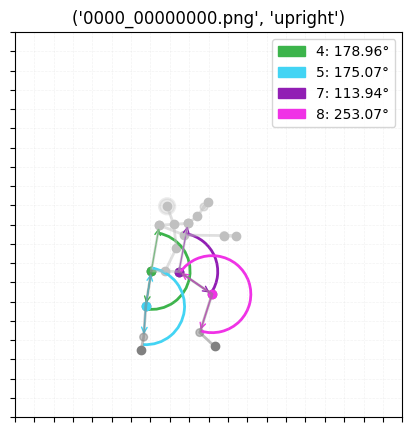

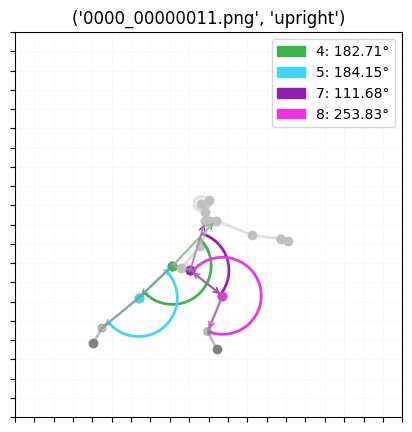

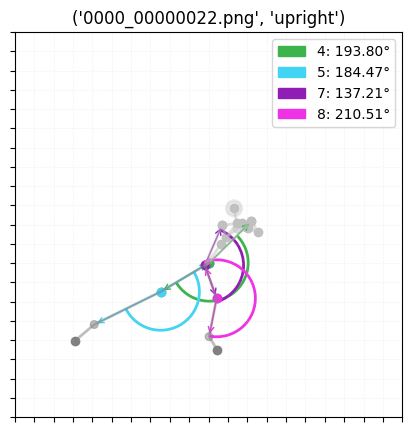

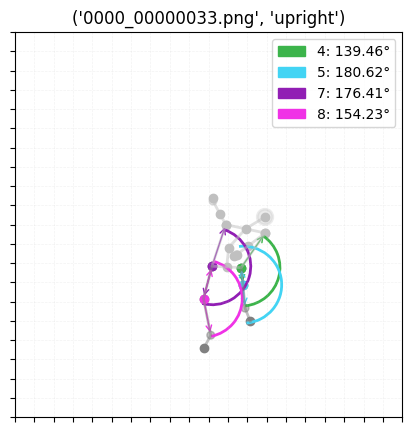

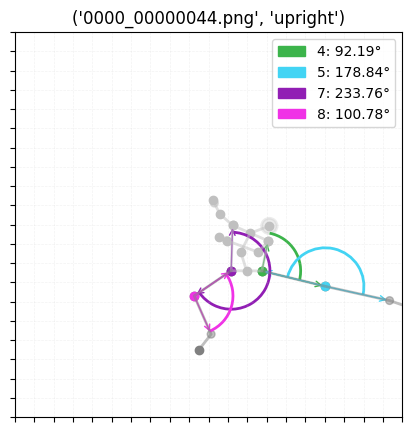

In [359]:
for i in range(0,5):
    plot_pose_figure_angles(data=upright,idx=i, spine=False, left_leg=True, right_leg=True)
    i+= 5

## 5.2.1 Music-Movement Synchronicity

In [1]:
import librosa
import librosa.display
import warnings
import moviepy.editor as mp

def plot_tempo_and_beats(video_url_path):
     with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        y_signal, sample_rate = librosa.load(video_url_path)
        tempo, beat_frames = librosa.beat.beat_track(y=y_signal, sr=sample_rate)

        fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(24, 12))
        y, sr = librosa.load(video_url_path)
        y_harm, y_perc = librosa.effects.hpss(y)
        librosa.display.waveshow(y, sr=sr, color='r', alpha=0.5, ax=ax[0], marker='.', label='Full signal')
        librosa.display.waveshow(y_harm, sr=sr, color='g', alpha=0.5, ax=ax[1], label='Harmonic')
        librosa.display.waveshow(y_perc, sr=sr, color='b', alpha=0.5, ax=ax[2], label='Percussive')
        for i in range(2):
            ax[i].set_xlim(2,31)
            ax[i].legend()
            ax[i].set_xticks(np.arange(1, 30, 1))
            ax[i].grid()
        plt.show()

        return tempo, beat_frames

video_url_path = 'data/ground_truth/uploads/combined.mp4'
tempo, beat_times = plot_tempo_and_beats(video_url_path)
print(tempo, beat_times)

NameError: name 'plt' is not defined

## 5.2.2 HR-Movement Synchronicity

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write

hrv_data = pd.read_csv('docs/data/polar_hrv.csv')

hrv_data = hrv_data.iloc[2:, 1:3].reset_index(drop=True)
hrv_data.columns = ['seconds', 'bpm']
hrv_data

hrv_data['bpm'] = pd.to_numeric(hrv_data['bpm'], errors='coerce')

print(len(hrv_data))


def generate_beat_sound(hrv_data, sample_rate=44100, frequency=440, volume=0.01):
    intervals = 60 / hrv_data['bpm']  # intervals between beats in seconds
    durations = np.minimum(intervals / 5, 0.3)  # duration of each beat sound
    total_duration = np.sum(intervals)
    sound_wave = np.zeros(int(total_duration * sample_rate))

    current_sample = 0
    for interval, duration in zip(intervals, durations):
        beep_length = int(duration * sample_rate)
        silence_length = int((interval - duration) * sample_rate)        
        beep = np.sin(np.linspace(0, duration * frequency * 2 * np.pi, beep_length))
        beep = (beep * volume * 32767).astype(np.int16)
        
        sound_wave[current_sample:current_sample + beep_length] = beep
        current_sample += beep_length + silence_length

    # Output path for the WAV file
    output_path = 'heartbeat_sound.wav'
    write(output_path, sample_rate, sound_wave)

    return output_path


# Use the function with your hrv_data DataFrame
output_path = generate_beat_sound(hrv_data)

# Output path is the file path where the heartbeat sound is saved
print(f"Heartbeat sound has been saved to: {output_path}")